<a href="https://colab.research.google.com/github/PhilllipK/Multivariable-regression-for-flooding/blob/main/multivariable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
total = pd.read_csv('Insurance cost for states and counties w_ per capita income and NRI.csv')
cost = list(total["Cost"])
for i in range(len(cost)):
  if len(cost[i]) == 5:
    cost[i] = cost[i][:1] + cost[i][2:]
  cost[i] = int(cost[i])

income = list(total["Income"])
for i in range(len(income)):
  comma = income[i].find(",")
  income[i] = income[i][:comma] + income[i][comma+1:]
  income[i] = int(income[i])

total["Cost"] = cost
total["Income"] = income
total

,Unnamed: 0,Cost,State,Income,NRI for flooding
0,Apache,853,Arizona,45633,130563.7
1,Cochise,1689,Arizona,50195,4143755.0
2,Coconino,899,Arizona,58933,15406612.0
3,Gila,853,Arizona,50505,4684136.0
4,Graham,853,Arizona,40981,847155.5
...,...,...,...,...,...
1011,Waukesha,1816,Wisconsin,87582,1903762.0
1012,Waupaca,2373,Wisconsin,54632,116475.6
1013,Waushara,1576,Wisconsin,46697,146562.3
1014,Winnebago,1312,Wisconsin,56878,1452899.0


In [21]:
cost = list(total["Cost"])
income = list(total["Income"])
nri= list(total["NRI for flooding"])

info = pearsonr(cost, nri)

print("Correlation coefficent: "+ str(info[0]))
print("p-value: "+ str(info[1]))

Correlation coefficent: -0.022169830829375188
p-value: 0.4802660165258752


In [ ]:

incomewnri = []

for i in range(len(cost)):
  incomewnri.append([nri[i],income[i]])
#there is a
model = sm.OLS(cost,incomewnri).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.875
Method:                 Least Squares   F-statistic:                              3542.
Date:                Sat, 04 May 2024   Prob (F-statistic):                        0.00
Time:                        15:35:03   Log-Likelihood:                         -8147.0
No. Observations:                1016   AIC:                                  1.630e+04
Df Residuals:                    1014   BIC:                                  1.631e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
cost = list(total["Cost"])
income = list(total["Income"])
nri= list(total["NRI for flooding"])

incomewnri = []

for i in range(len(cost)):
  incomewnri.append([nri[i],income[i]])
#there is a
incomewnri = sm.add_constant(incomewnri)
model = sm.OLS(cost,incomewnri).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     29.20
Date:                Sat, 04 May 2024   Prob (F-statistic):           4.67e-13
Time:                        15:26:24   Log-Likelihood:                -8004.6
No. Observations:                1016   AIC:                         1.602e+04
Df Residuals:                    1013   BIC:                         1.603e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1409.4552     77.831     18.109      0.0

In [ ]:
X = total[['Cost', 'Income', 'NRI for flooding']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0              Cost  7.985789
1            Income  8.212485
2  NRI for flooding  1.219283


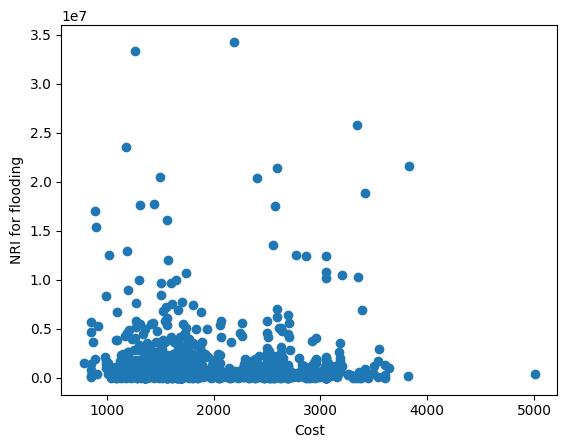

In [23]:
fig, ax = plt.subplots()
ax.scatter(total['Cost'], total['NRI for flooding'])
ax.set_xlabel('Cost')
ax.set_ylabel('NRI for flooding')
plt.show()

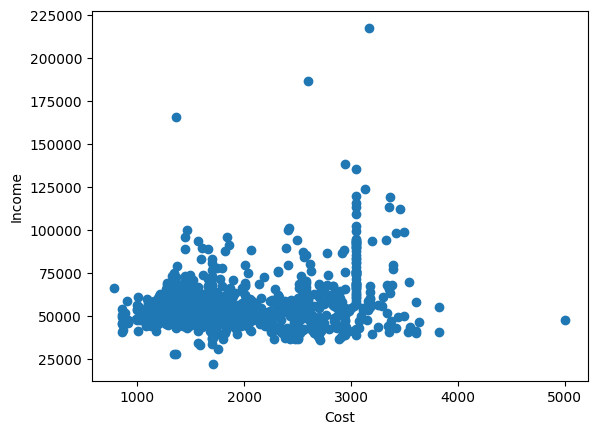

In [25]:
fig, ax = plt.subplots()
ax.scatter(total['Cost'], total['Income'])
ax.set_xlabel('Cost')
ax.set_ylabel('Income')
plt.show()